# 3.0-Normalization and Embedding 

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Normalize data and create embeddings for this time point fraction

In [2]:
timepoint <- "T5"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#here::dr_here(show_reason = TRUE)
source(here::here("SCGRES_99_100/sc_analysis/misc/paths.R"))

"{clust}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{clust}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here::here(glue::glue("{qc}/{robj_dir}/clean_combined_object_{timepoint}.rds")))

## Normalization and linear dimensional reduction

In [6]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [7]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 25894 20785 
metadata(0):
assays(2): counts logcounts
rownames(25894): AL627309.1 AL627309.3 ... AC007325.4 AC007325.2
rowData names(0):
colnames(20785): AAACCTGAGAATGTGT-1 AAACCTGAGACGCTTT-1 ...
  TTTGTCATCCTTCAAT-1 TTTGTCATCTTCATGT-1
colData names(12): orig.ident nCount_RNA ... doublet_pred ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


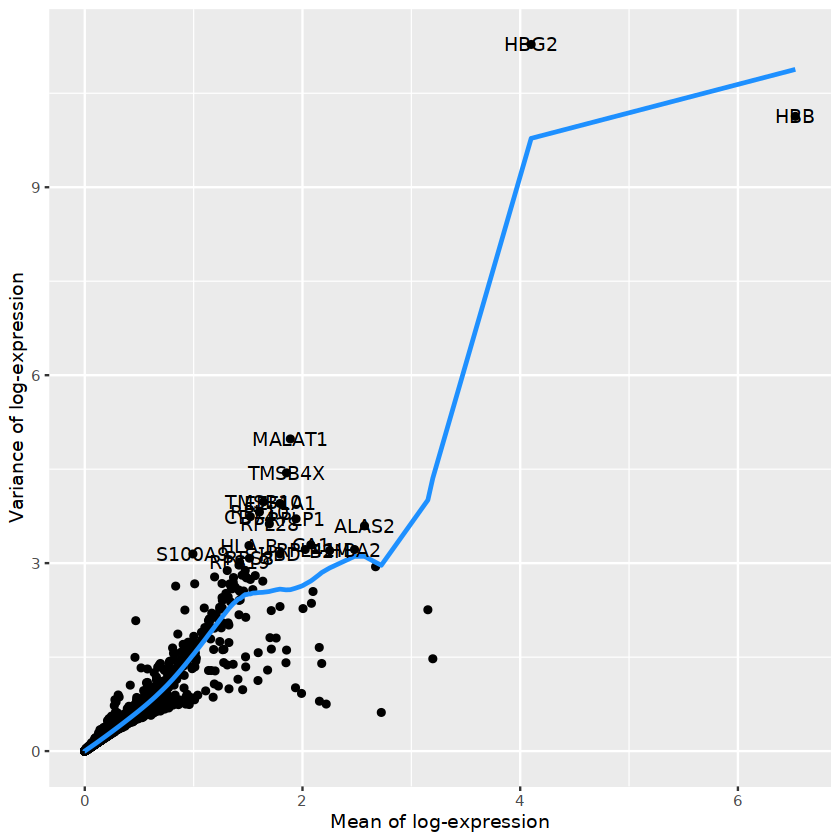

In [8]:
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [9]:
gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

,mean,total,tech,bio,p.value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HBG2,4.1007199,11.279120,9.780493,1.4986275,2.298584e-01,8.560216e-01
HBB,6.5275633,10.131634,10.881267,-0.7496329,6.302074e-01,8.560216e-01
MALAT1,1.8883509,4.982471,2.575925,2.4065451,3.276519e-06,1.029312e-03
TMSB4X,1.8529439,4.440870,2.573996,1.8668736,2.330905e-04,3.777848e-02
TMSB10,1.6424903,3.979627,2.535740,1.4438873,3.003366e-03,3.073164e-01
EEF1A1,1.7938491,3.952031,2.584966,1.3670648,5.359934e-03,4.391589e-01
RPL10,1.6043005,3.815955,2.531151,1.2848038,7.159821e-03,5.372648e-01
CD74,1.5208095,3.742114,2.507612,1.2345024,8.766232e-03,6.196265e-01
RPLP1,1.9408628,3.707637,2.603185,1.1044524,2.032449e-02,8.560216e-01


In [10]:
gene_var = gene_var[!(row.names(gene_var) %in% c("HBB", "HBG2")), ]
gene_var

DataFrame with 25892 rows and 6 columns
                  mean       total        tech          bio   p.value       FDR
             <numeric>   <numeric>   <numeric>    <numeric> <numeric> <numeric>
AL627309.1 6.32118e-04 7.96145e-04 7.71811e-04  2.43338e-05  0.439545  0.856022
AL627309.3 5.94186e-05 7.33828e-05 7.25509e-05  8.31922e-07  0.477939  0.856022
AL627309.5 8.14287e-03 1.00176e-02 9.94005e-03  7.75430e-05  0.484987  0.856022
AL627309.4 4.62814e-05 4.45207e-05 5.65102e-05 -1.19895e-05  0.847009  0.927969
AP006222.2 4.33554e-05 3.90695e-05 5.29376e-05 -1.38682e-05  0.896887  0.955542
...                ...         ...         ...          ...       ...       ...
AC004556.3 8.14949e-05 1.38042e-04 9.95063e-05  3.85355e-05 0.0308425  0.856022
AC233755.2 3.91190e-05 3.18073e-05 4.77649e-05 -1.59577e-05 0.9465152  0.980209
AC007325.1 4.74310e-04 4.90940e-04 5.79131e-04 -8.81917e-05 0.7687574  0.888911
AC007325.4 1.71363e-04 1.65156e-04 2.09236e-04 -4.40794e-05 0.8452976  0.927169


In [11]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.1)
length(hvgs)

[1] 184

In [12]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  NKG7, GZMA, CTSW, PRF1, CST7, GNLY, IFITM1, CD247, IL2RB, GZMB 
	   CD69, IL32, GZMH, KLRB1, CCL5, GZMK, CCL4, CD3E, FGFBP2, XCL2 
	   XCL1, MALAT1, TMSB4X, CD3D, FCGR3A, LTB, CD8B, ZNF683, TRAV17, TRBV3-1 
Negative:  LYZ, S100A9, VCAN, S100A8, PPBP, CD1C, C1QA, C1QB, HBE1, CNTNAP3 
	   AC010271.2, ARSI, IGLC2, AL162464.1, AC015712.1, ASIC4, AL355816.1, TPSB2, AC127496.3, AC080132.1 
	   CDO1, CA10, AL161668.1, LINC02426, CTXND1, PRRT1, LINC00620, AC131649.1, LINC01975, AC016382.1 
PC_ 2 
Positive:  LYZ, S100A9, S100A8, VCAN, TMSB4X, MALAT1, PPBP, FCGR3A, C1QA, CCL5 
	   CD1C, C1QB, IFITM1, LTB, NKG7, TRBV7-3, AC004053.1, CD8B, ALPL, LILRA4 
	   TRBV12-4, FOXP3, HBE1, TRBV20-1, PTGDS, TRBV9, TRBV29-1, TRBV19, CD3D, TRBV25-1 
Negative:  XCL2, XCL1, IL2RB, GNLY, PRF1, GZMA, GZMB, GZMK, CD247, KLRB1 
	   GZMH, CTSW, CST7, FGFBP2, IL32, CD3E, CCL4, CD69, ZNF683, IGKC 
	   JCHAIN, TRGV2, AL162464.1, TRBV12-3, TRAV1-1, ASIC4, AC119868.2, C

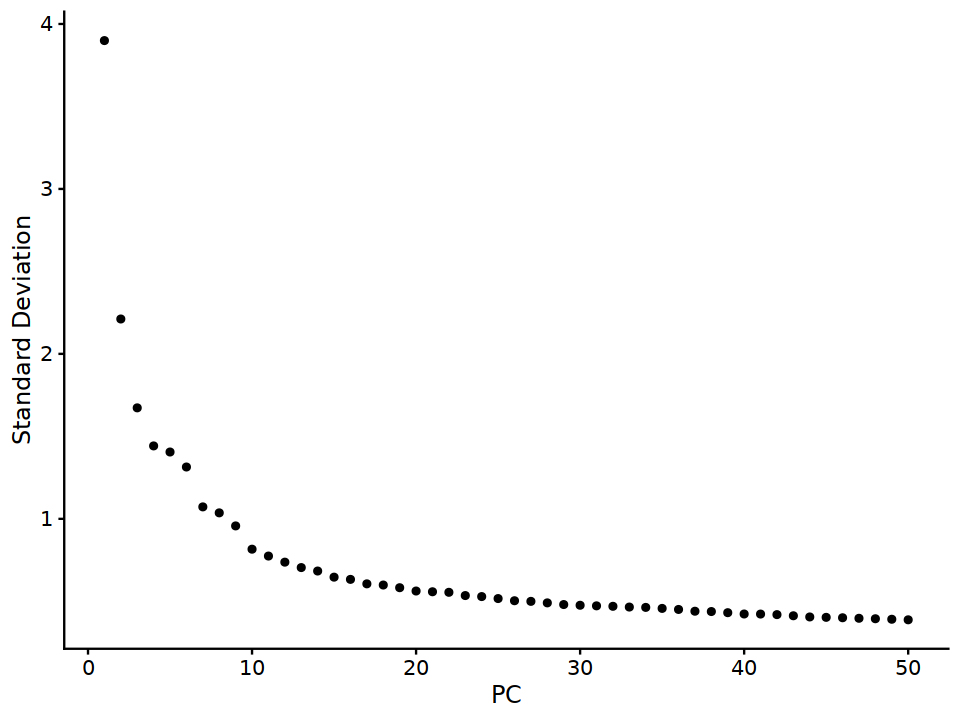

In [13]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

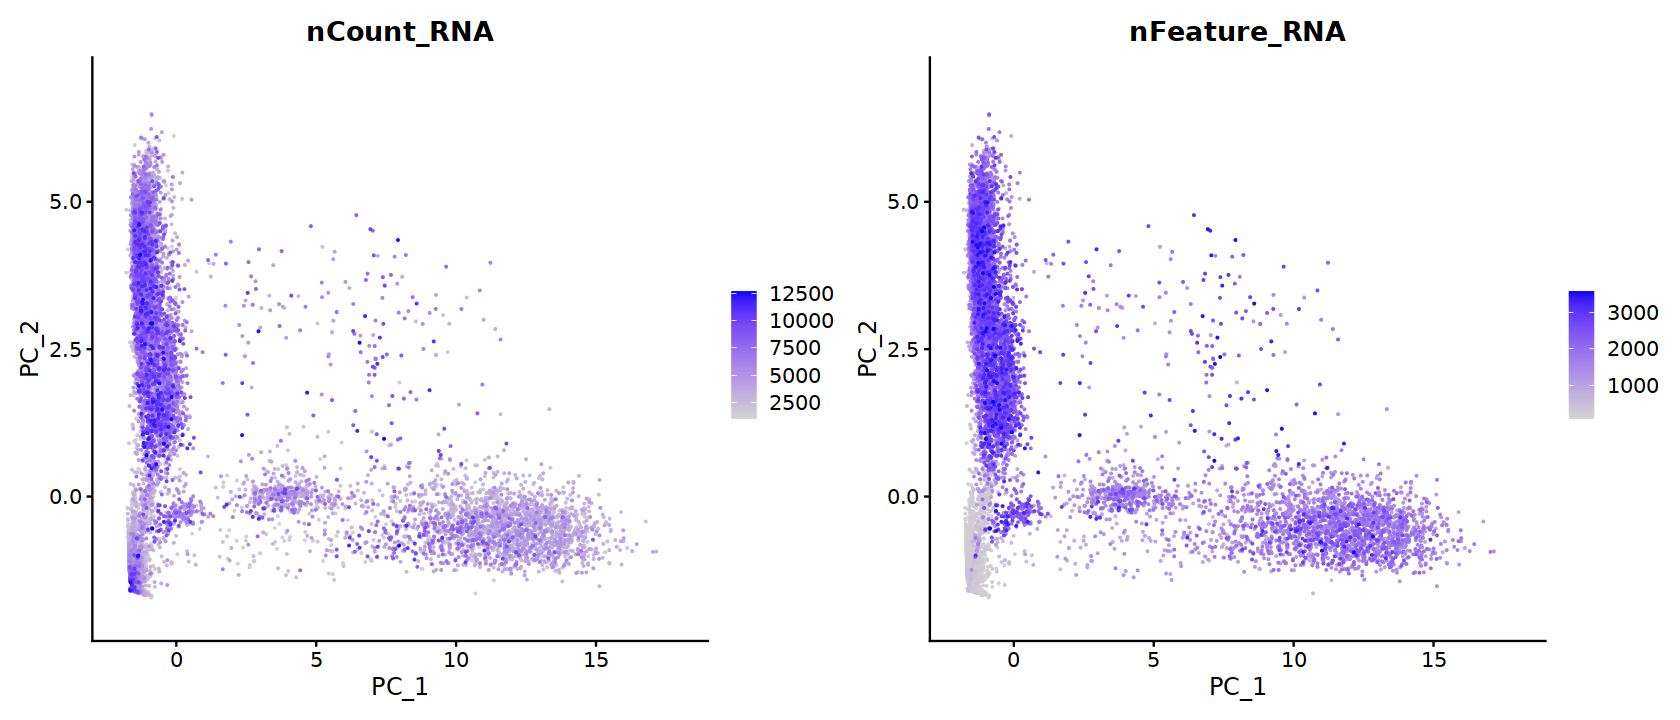

In [14]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

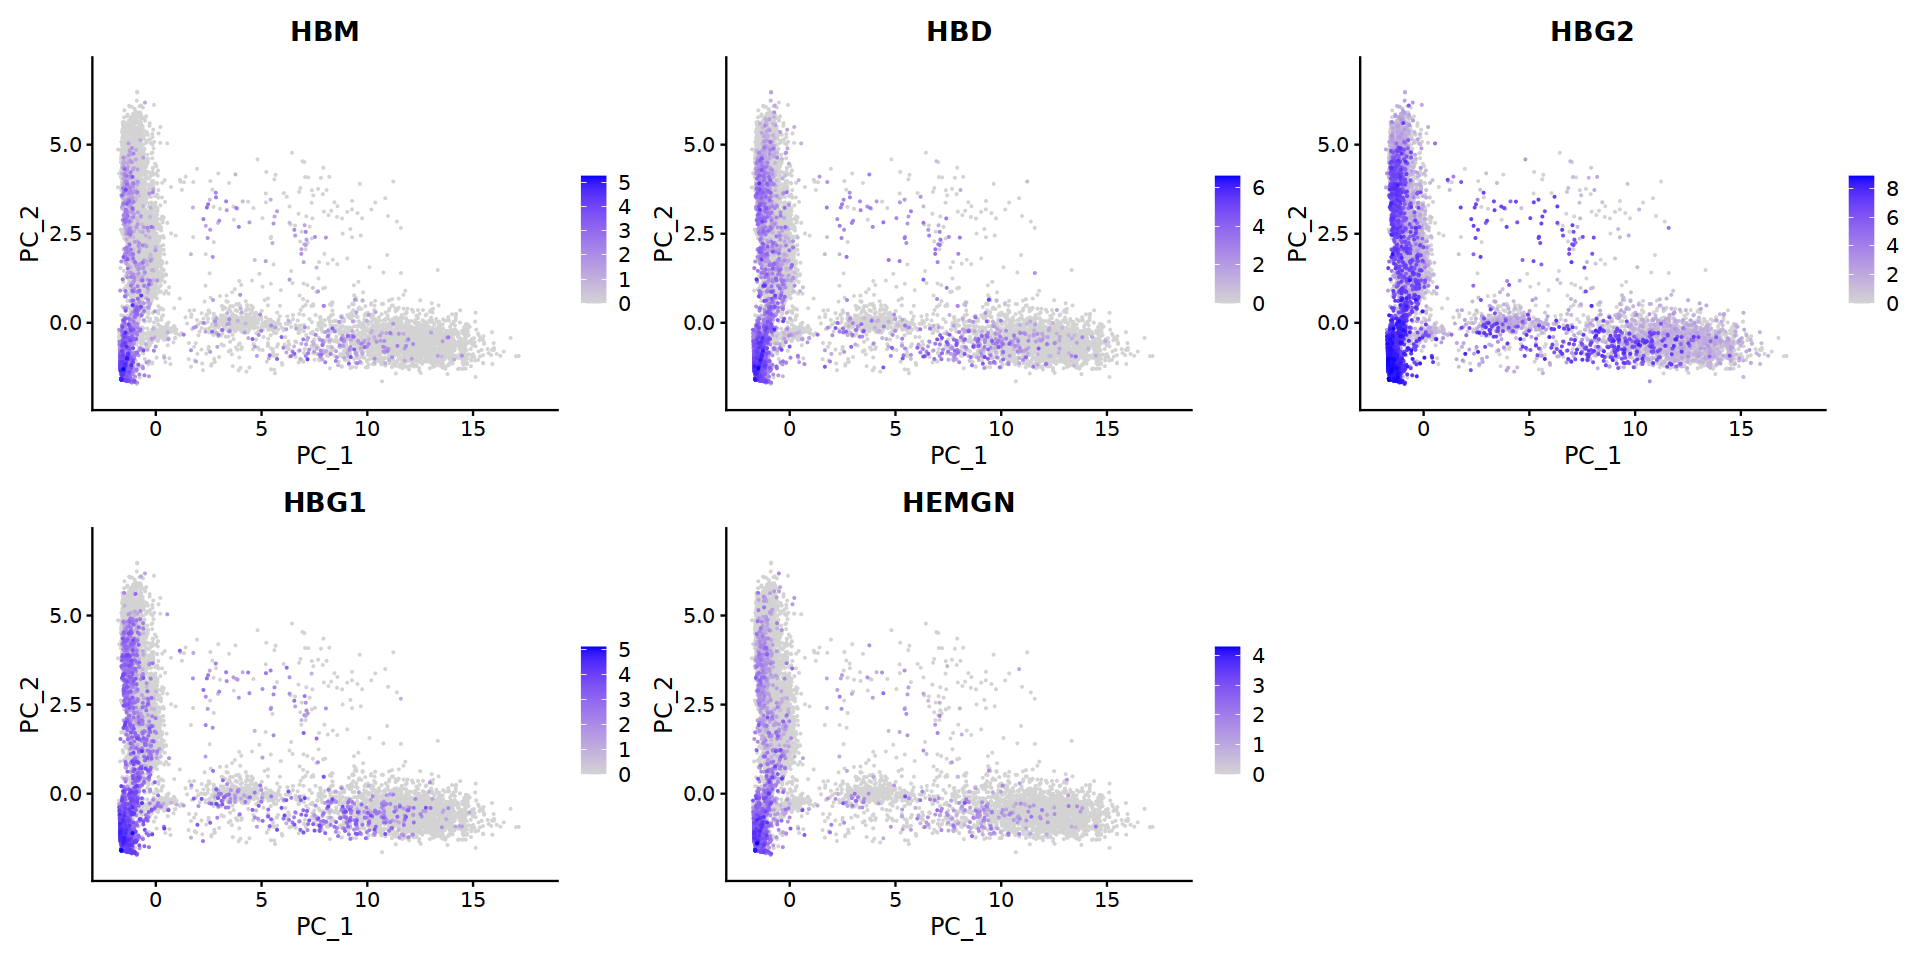

In [15]:
options(repr.plot.width = 16, repr.plot.height = 8, warn=-1,verbose = FALSE)
hemo_genes = c("HBM", "HBD", "HBG2","HBG1", "HEMGN")

FeaturePlot(seurat_obj, reduction = "pca", feature=hemo_genes, order = TRUE, ncol=3)

## UMAP representation

In [ ]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:15,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

12:23:13 UMAP embedding parameters a = 0.9922 b = 1.112

12:23:13 Read 20785 rows and found 15 numeric columns

12:23:13 Using Annoy for neighbor search, n_neighbors = 30

12:23:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:23:16 Writing NN index file to temp file /scratch_tmp/33937378/Rtmp6Y4Jvb/file22e2c716264da

12:23:16 Searching Annoy index using 1 thread, search_k = 3000

12:23:22 Annoy recall = 48.32%

12:23:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:23:23 8321 smooth knn distance failures

12:23:25 Initializing from normalized Laplacian + noise (using irlba)

12:23:27 Commencing optimization for 200 epochs, with 949056 positive edges



In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle('UMAP') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## More quality checks on UMAPs

### Compute Cell-Cycle Scores

In [ ]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seurat_obj <- CellCycleScoring(seurat_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

### Plot several features

In [ ]:
cat_vars <-c("Phase")
con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "HBM")
vars <- c(cat_vars, con_vars)

In [ ]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, order = TRUE)
  }
  return(p)
})

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 6, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 2)
cp

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8, warn=-1,verbose = FALSE)
hemo_genes = c("HBM", "HBD", "HBG2","HBG1", "HEMGN")

FeaturePlot(seurat_obj, reduction = "umap", feature=hemo_genes, order = FALSE, ncol=3)

# Save

In [ ]:
saveRDS(seurat_obj, here::here(glue::glue("{clust}/{robj_dir}/dimred_combined_object_{timepoint}.rds")))

# Session Info

In [ ]:
sessionInfo()